In [1]:
import networkx as nx
import pandas as pd
import scipy.stats as stats
import matplotlib
import numpy as np

In [2]:
dataPath18 = "data/atp_matches_2018.csv"
dataPath19 = "data/atp_matches_2019.csv"
dataPath20 = "data/atp_matches_2020.csv"

li = []

df = pd.read_csv(dataPath18) 
li.append(df)
df = pd.read_csv(dataPath19) 
li.append(df)
df = pd.read_csv(dataPath20) 
li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

In [3]:
data

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2018-M020,Brisbane,Hard,32,A,20180101,271,105992,NaN,NaN,...,47.0,33.0,19.0,14.0,1.0,4.0,47.0,1010.0,52.0,909.0
1,2018-M020,Brisbane,Hard,32,A,20180101,272,111577,NaN,NaN,...,41.0,25.0,7.0,9.0,7.0,11.0,54.0,890.0,94.0,593.0
2,2018-M020,Brisbane,Hard,32,A,20180101,273,104797,NaN,NaN,...,53.0,37.0,29.0,15.0,10.0,16.0,63.0,809.0,30.0,1391.0
3,2018-M020,Brisbane,Hard,32,A,20180101,275,200282,NaN,WC,...,43.0,33.0,17.0,11.0,4.0,6.0,208.0,245.0,44.0,1055.0
4,2018-M020,Brisbane,Hard,32,A,20180101,276,111581,NaN,Q,...,35.0,28.0,5.0,9.0,0.0,2.0,175.0,299.0,68.0,755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7112,2020-M-DC-2020-WG2-PO-POL-HKG-01,Davis Cup WG2 PO: POL vs HKG,Hard,4,D,20200306,2,105668,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,461.0,68.0,960.0,11.0
7113,2020-M-DC-2020-WG2-PO-POL-HKG-01,Davis Cup WG2 PO: POL vs HKG,Hard,4,D,20200306,4,209874,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7114,2020-M-DC-2020-WG2-PO-SYR-ZIM-01,Davis Cup WG2 PO: SYR vs ZIM,Hard,4,D,20200306,1,208518,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,813.0,18.0
7115,2020-M-DC-2020-WG2-PO-SYR-ZIM-01,Davis Cup WG2 PO: SYR vs ZIM,Hard,4,D,20200306,2,111761,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,430.0,79.0,NaN,NaN


In [4]:
import pickle

with open("data/data_cleaned_united", 'wb') as file:
    pickle.dump(data, file)

In [5]:
import pickle

with open("data/data_cleaned_united", 'rb') as file:
    data = pickle.load(file)

In [6]:
list_winner = set(data['winner_name'].unique())
list_looser = set(data['loser_name'].unique())

skup_id = list_winner.union(list_looser)
print(f"Postoji { len(skup_id) } različitih igrača") # formatiranje ispisa pomoću fstringa

Postoji 581 različitih igrača


In [7]:
import numpy as np
import matplotlib.pyplot as plt

data['id'] = data.index

data_reduced = data[['winner_name', 'loser_name', 'winner_rank','loser_rank', 'winner_ioc', 'loser_ioc', 'id' ]]
print(data_reduced)

           winner_name                  loser_name  winner_rank  loser_rank  \
0        Ryan Harrison              Leonardo Mayer         47.0        52.0   
1      Jared Donaldson             Jordan Thompson         54.0        94.0   
2        Denis Istomin               Damir Dzumhur         63.0        30.0   
3       Alex De Minaur               Steve Johnson        208.0        44.0   
4         Michael Mmoh           Federico Delbonis        175.0        68.0   
...                ...                         ...          ...         ...   
7112    Jerzy Janowicz              Pak Long Yeung        461.0       960.0   
7113  Maks Kasnikowski                  Wai Yu Kai          NaN         NaN   
7114         Hazem Naw  Mehluli Don Ayanda Sibanda          NaN       813.0   
7115     Benjamin Lock                   Amer Naow        430.0         NaN   
7116     Benjamin Lock                   Hazem Naw        430.0         NaN   

     winner_ioc loser_ioc    id  
0           USA  

In [8]:
list_nations = []
for i in skup_id:
    print(i)
    if(len(data[(data['winner_name'] == i)]) > 0):
        result = data[(data['winner_name'] == i)]['winner_ioc']
        list_nations.append((result.iloc[0]))
    elif(len(data[(data['loser_name'] == i)]) > 0):
        result = data[(data['loser_name'] == i)]['loser_ioc']
        list_nations.append((result.iloc[0]))
    print(list_nations)

Bernard Tomic
['AUS']
Felipe Meligeni Rodrigues Alves
['AUS', 'BRA']
Sanjar Fayziev
['AUS', 'BRA', 'UZB']
Viktor Troicki
['AUS', 'BRA', 'UZB', 'SRB']
Julian Lenz
['AUS', 'BRA', 'UZB', 'SRB', 'GER']
Laurynas Grigelis
['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU']
Kaipo Marshall
['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR']
Daniel Masur
['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER']
Alexander Zverev
['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER']
Pedro Sakamoto
['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA']
Andrew Harris
['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS']
Peter August Anker
['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR']
Kenneth Raisma
['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST']
Duck Hee Lee
['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST', 'KOR']
Ari Fahresi
['AUS', 'BRA

['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST', 'KOR', 'INA', 'SUI', 'ROU', 'BRA', 'GER', 'CHN', 'INA', 'EST', 'ESP', 'GER', 'GER', 'ESP', 'ARG', 'SVK', 'KOR', 'ITA', 'FRA', 'NED', 'BOL', 'AUS', 'SRB', 'URU', 'RSA', 'ITA', 'ITA', 'RUS', 'JPN', 'BLR', 'BRA', 'EGY', 'PER', 'DEN', 'GBR', 'GER', 'URU', 'USA', 'UNK', 'FRA', 'MDA', 'RSA', 'ESP', 'GEO', 'TPE', 'GER', 'RUS', 'CRC', 'COL', 'MEX', 'CZE', 'USA', 'JPN', 'CZE', 'CRO', 'CHI', 'ITA', 'ITA']
Tung Lin Wu
['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST', 'KOR', 'INA', 'SUI', 'ROU', 'BRA', 'GER', 'CHN', 'INA', 'EST', 'ESP', 'GER', 'GER', 'ESP', 'ARG', 'SVK', 'KOR', 'ITA', 'FRA', 'NED', 'BOL', 'AUS', 'SRB', 'URU', 'RSA', 'ITA', 'ITA', 'RUS', 'JPN', 'BLR', 'BRA', 'EGY', 'PER', 'DEN', 'GBR', 'GER', 'URU', 'USA', 'UNK', 'FRA', 'MDA', 'RSA', 'ESP', 'GEO', 'TPE', 'GER', 'RUS', 'CRC', 'COL', 'MEX', 'CZE', 'USA', 'JPN', 'CZE', 'CRO', 'CHI', 'ITA', 'ITA', 'TPE']

['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST', 'KOR', 'INA', 'SUI', 'ROU', 'BRA', 'GER', 'CHN', 'INA', 'EST', 'ESP', 'GER', 'GER', 'ESP', 'ARG', 'SVK', 'KOR', 'ITA', 'FRA', 'NED', 'BOL', 'AUS', 'SRB', 'URU', 'RSA', 'ITA', 'ITA', 'RUS', 'JPN', 'BLR', 'BRA', 'EGY', 'PER', 'DEN', 'GBR', 'GER', 'URU', 'USA', 'UNK', 'FRA', 'MDA', 'RSA', 'ESP', 'GEO', 'TPE', 'GER', 'RUS', 'CRC', 'COL', 'MEX', 'CZE', 'USA', 'JPN', 'CZE', 'CRO', 'CHI', 'ITA', 'ITA', 'TPE', 'INA', 'URU', 'SUI', 'AUT', 'PHI', 'SRB', 'ITA', 'ARG', 'GER', 'PAK', 'ESP', 'AUS', 'ROU', 'ISR', 'KEN', 'PHI', 'ITA', 'ESP', 'GRE', 'POR', 'KAZ', 'AUS', 'USA', 'PHI', 'ESP', 'FRA', 'MAR', 'BIH', 'UKR', 'ITA', 'INA', 'POL', 'ARG', 'MEX', 'GER', 'SVK', 'BRA', 'USA', 'HKG', 'TUR', 'ESP', 'ECU', 'HUN', 'JPN', 'RUS', 'IND', 'FIN', 'PAR', 'URU', 'PAK', 'EST', 'PAK', 'COL', 'VIE', 'NOR', 'SLO', 'FRA', 'ARG', 'VEN', 'HUN', 'RUS', 'RUS', 'SUI', 'PHI', 'CRO', 'USA', 'URU']
Marsel Ilhan
['AUS', 'BRA', 'UZB'

['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST', 'KOR', 'INA', 'SUI', 'ROU', 'BRA', 'GER', 'CHN', 'INA', 'EST', 'ESP', 'GER', 'GER', 'ESP', 'ARG', 'SVK', 'KOR', 'ITA', 'FRA', 'NED', 'BOL', 'AUS', 'SRB', 'URU', 'RSA', 'ITA', 'ITA', 'RUS', 'JPN', 'BLR', 'BRA', 'EGY', 'PER', 'DEN', 'GBR', 'GER', 'URU', 'USA', 'UNK', 'FRA', 'MDA', 'RSA', 'ESP', 'GEO', 'TPE', 'GER', 'RUS', 'CRC', 'COL', 'MEX', 'CZE', 'USA', 'JPN', 'CZE', 'CRO', 'CHI', 'ITA', 'ITA', 'TPE', 'INA', 'URU', 'SUI', 'AUT', 'PHI', 'SRB', 'ITA', 'ARG', 'GER', 'PAK', 'ESP', 'AUS', 'ROU', 'ISR', 'KEN', 'PHI', 'ITA', 'ESP', 'GRE', 'POR', 'KAZ', 'AUS', 'USA', 'PHI', 'ESP', 'FRA', 'MAR', 'BIH', 'UKR', 'ITA', 'INA', 'POL', 'ARG', 'MEX', 'GER', 'SVK', 'BRA', 'USA', 'HKG', 'TUR', 'ESP', 'ECU', 'HUN', 'JPN', 'RUS', 'IND', 'FIN', 'PAR', 'URU', 'PAK', 'EST', 'PAK', 'COL', 'VIE', 'NOR', 'SLO', 'FRA', 'ARG', 'VEN', 'HUN', 'RUS', 'RUS', 'SUI', 'PHI', 'CRO', 'USA', 'URU', 'TUR', 'COL', 'ARG', 'AUS', 'GEO'

['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST', 'KOR', 'INA', 'SUI', 'ROU', 'BRA', 'GER', 'CHN', 'INA', 'EST', 'ESP', 'GER', 'GER', 'ESP', 'ARG', 'SVK', 'KOR', 'ITA', 'FRA', 'NED', 'BOL', 'AUS', 'SRB', 'URU', 'RSA', 'ITA', 'ITA', 'RUS', 'JPN', 'BLR', 'BRA', 'EGY', 'PER', 'DEN', 'GBR', 'GER', 'URU', 'USA', 'UNK', 'FRA', 'MDA', 'RSA', 'ESP', 'GEO', 'TPE', 'GER', 'RUS', 'CRC', 'COL', 'MEX', 'CZE', 'USA', 'JPN', 'CZE', 'CRO', 'CHI', 'ITA', 'ITA', 'TPE', 'INA', 'URU', 'SUI', 'AUT', 'PHI', 'SRB', 'ITA', 'ARG', 'GER', 'PAK', 'ESP', 'AUS', 'ROU', 'ISR', 'KEN', 'PHI', 'ITA', 'ESP', 'GRE', 'POR', 'KAZ', 'AUS', 'USA', 'PHI', 'ESP', 'FRA', 'MAR', 'BIH', 'UKR', 'ITA', 'INA', 'POL', 'ARG', 'MEX', 'GER', 'SVK', 'BRA', 'USA', 'HKG', 'TUR', 'ESP', 'ECU', 'HUN', 'JPN', 'RUS', 'IND', 'FIN', 'PAR', 'URU', 'PAK', 'EST', 'PAK', 'COL', 'VIE', 'NOR', 'SLO', 'FRA', 'ARG', 'VEN', 'HUN', 'RUS', 'RUS', 'SUI', 'PHI', 'CRO', 'USA', 'URU', 'TUR', 'COL', 'ARG', 'AUS', 'GEO'

['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST', 'KOR', 'INA', 'SUI', 'ROU', 'BRA', 'GER', 'CHN', 'INA', 'EST', 'ESP', 'GER', 'GER', 'ESP', 'ARG', 'SVK', 'KOR', 'ITA', 'FRA', 'NED', 'BOL', 'AUS', 'SRB', 'URU', 'RSA', 'ITA', 'ITA', 'RUS', 'JPN', 'BLR', 'BRA', 'EGY', 'PER', 'DEN', 'GBR', 'GER', 'URU', 'USA', 'UNK', 'FRA', 'MDA', 'RSA', 'ESP', 'GEO', 'TPE', 'GER', 'RUS', 'CRC', 'COL', 'MEX', 'CZE', 'USA', 'JPN', 'CZE', 'CRO', 'CHI', 'ITA', 'ITA', 'TPE', 'INA', 'URU', 'SUI', 'AUT', 'PHI', 'SRB', 'ITA', 'ARG', 'GER', 'PAK', 'ESP', 'AUS', 'ROU', 'ISR', 'KEN', 'PHI', 'ITA', 'ESP', 'GRE', 'POR', 'KAZ', 'AUS', 'USA', 'PHI', 'ESP', 'FRA', 'MAR', 'BIH', 'UKR', 'ITA', 'INA', 'POL', 'ARG', 'MEX', 'GER', 'SVK', 'BRA', 'USA', 'HKG', 'TUR', 'ESP', 'ECU', 'HUN', 'JPN', 'RUS', 'IND', 'FIN', 'PAR', 'URU', 'PAK', 'EST', 'PAK', 'COL', 'VIE', 'NOR', 'SLO', 'FRA', 'ARG', 'VEN', 'HUN', 'RUS', 'RUS', 'SUI', 'PHI', 'CRO', 'USA', 'URU', 'TUR', 'COL', 'ARG', 'AUS', 'GEO'

['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST', 'KOR', 'INA', 'SUI', 'ROU', 'BRA', 'GER', 'CHN', 'INA', 'EST', 'ESP', 'GER', 'GER', 'ESP', 'ARG', 'SVK', 'KOR', 'ITA', 'FRA', 'NED', 'BOL', 'AUS', 'SRB', 'URU', 'RSA', 'ITA', 'ITA', 'RUS', 'JPN', 'BLR', 'BRA', 'EGY', 'PER', 'DEN', 'GBR', 'GER', 'URU', 'USA', 'UNK', 'FRA', 'MDA', 'RSA', 'ESP', 'GEO', 'TPE', 'GER', 'RUS', 'CRC', 'COL', 'MEX', 'CZE', 'USA', 'JPN', 'CZE', 'CRO', 'CHI', 'ITA', 'ITA', 'TPE', 'INA', 'URU', 'SUI', 'AUT', 'PHI', 'SRB', 'ITA', 'ARG', 'GER', 'PAK', 'ESP', 'AUS', 'ROU', 'ISR', 'KEN', 'PHI', 'ITA', 'ESP', 'GRE', 'POR', 'KAZ', 'AUS', 'USA', 'PHI', 'ESP', 'FRA', 'MAR', 'BIH', 'UKR', 'ITA', 'INA', 'POL', 'ARG', 'MEX', 'GER', 'SVK', 'BRA', 'USA', 'HKG', 'TUR', 'ESP', 'ECU', 'HUN', 'JPN', 'RUS', 'IND', 'FIN', 'PAR', 'URU', 'PAK', 'EST', 'PAK', 'COL', 'VIE', 'NOR', 'SLO', 'FRA', 'ARG', 'VEN', 'HUN', 'RUS', 'RUS', 'SUI', 'PHI', 'CRO', 'USA', 'URU', 'TUR', 'COL', 'ARG', 'AUS', 'GEO'

['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST', 'KOR', 'INA', 'SUI', 'ROU', 'BRA', 'GER', 'CHN', 'INA', 'EST', 'ESP', 'GER', 'GER', 'ESP', 'ARG', 'SVK', 'KOR', 'ITA', 'FRA', 'NED', 'BOL', 'AUS', 'SRB', 'URU', 'RSA', 'ITA', 'ITA', 'RUS', 'JPN', 'BLR', 'BRA', 'EGY', 'PER', 'DEN', 'GBR', 'GER', 'URU', 'USA', 'UNK', 'FRA', 'MDA', 'RSA', 'ESP', 'GEO', 'TPE', 'GER', 'RUS', 'CRC', 'COL', 'MEX', 'CZE', 'USA', 'JPN', 'CZE', 'CRO', 'CHI', 'ITA', 'ITA', 'TPE', 'INA', 'URU', 'SUI', 'AUT', 'PHI', 'SRB', 'ITA', 'ARG', 'GER', 'PAK', 'ESP', 'AUS', 'ROU', 'ISR', 'KEN', 'PHI', 'ITA', 'ESP', 'GRE', 'POR', 'KAZ', 'AUS', 'USA', 'PHI', 'ESP', 'FRA', 'MAR', 'BIH', 'UKR', 'ITA', 'INA', 'POL', 'ARG', 'MEX', 'GER', 'SVK', 'BRA', 'USA', 'HKG', 'TUR', 'ESP', 'ECU', 'HUN', 'JPN', 'RUS', 'IND', 'FIN', 'PAR', 'URU', 'PAK', 'EST', 'PAK', 'COL', 'VIE', 'NOR', 'SLO', 'FRA', 'ARG', 'VEN', 'HUN', 'RUS', 'RUS', 'SUI', 'PHI', 'CRO', 'USA', 'URU', 'TUR', 'COL', 'ARG', 'AUS', 'GEO'

['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST', 'KOR', 'INA', 'SUI', 'ROU', 'BRA', 'GER', 'CHN', 'INA', 'EST', 'ESP', 'GER', 'GER', 'ESP', 'ARG', 'SVK', 'KOR', 'ITA', 'FRA', 'NED', 'BOL', 'AUS', 'SRB', 'URU', 'RSA', 'ITA', 'ITA', 'RUS', 'JPN', 'BLR', 'BRA', 'EGY', 'PER', 'DEN', 'GBR', 'GER', 'URU', 'USA', 'UNK', 'FRA', 'MDA', 'RSA', 'ESP', 'GEO', 'TPE', 'GER', 'RUS', 'CRC', 'COL', 'MEX', 'CZE', 'USA', 'JPN', 'CZE', 'CRO', 'CHI', 'ITA', 'ITA', 'TPE', 'INA', 'URU', 'SUI', 'AUT', 'PHI', 'SRB', 'ITA', 'ARG', 'GER', 'PAK', 'ESP', 'AUS', 'ROU', 'ISR', 'KEN', 'PHI', 'ITA', 'ESP', 'GRE', 'POR', 'KAZ', 'AUS', 'USA', 'PHI', 'ESP', 'FRA', 'MAR', 'BIH', 'UKR', 'ITA', 'INA', 'POL', 'ARG', 'MEX', 'GER', 'SVK', 'BRA', 'USA', 'HKG', 'TUR', 'ESP', 'ECU', 'HUN', 'JPN', 'RUS', 'IND', 'FIN', 'PAR', 'URU', 'PAK', 'EST', 'PAK', 'COL', 'VIE', 'NOR', 'SLO', 'FRA', 'ARG', 'VEN', 'HUN', 'RUS', 'RUS', 'SUI', 'PHI', 'CRO', 'USA', 'URU', 'TUR', 'COL', 'ARG', 'AUS', 'GEO'

['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST', 'KOR', 'INA', 'SUI', 'ROU', 'BRA', 'GER', 'CHN', 'INA', 'EST', 'ESP', 'GER', 'GER', 'ESP', 'ARG', 'SVK', 'KOR', 'ITA', 'FRA', 'NED', 'BOL', 'AUS', 'SRB', 'URU', 'RSA', 'ITA', 'ITA', 'RUS', 'JPN', 'BLR', 'BRA', 'EGY', 'PER', 'DEN', 'GBR', 'GER', 'URU', 'USA', 'UNK', 'FRA', 'MDA', 'RSA', 'ESP', 'GEO', 'TPE', 'GER', 'RUS', 'CRC', 'COL', 'MEX', 'CZE', 'USA', 'JPN', 'CZE', 'CRO', 'CHI', 'ITA', 'ITA', 'TPE', 'INA', 'URU', 'SUI', 'AUT', 'PHI', 'SRB', 'ITA', 'ARG', 'GER', 'PAK', 'ESP', 'AUS', 'ROU', 'ISR', 'KEN', 'PHI', 'ITA', 'ESP', 'GRE', 'POR', 'KAZ', 'AUS', 'USA', 'PHI', 'ESP', 'FRA', 'MAR', 'BIH', 'UKR', 'ITA', 'INA', 'POL', 'ARG', 'MEX', 'GER', 'SVK', 'BRA', 'USA', 'HKG', 'TUR', 'ESP', 'ECU', 'HUN', 'JPN', 'RUS', 'IND', 'FIN', 'PAR', 'URU', 'PAK', 'EST', 'PAK', 'COL', 'VIE', 'NOR', 'SLO', 'FRA', 'ARG', 'VEN', 'HUN', 'RUS', 'RUS', 'SUI', 'PHI', 'CRO', 'USA', 'URU', 'TUR', 'COL', 'ARG', 'AUS', 'GEO'

['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST', 'KOR', 'INA', 'SUI', 'ROU', 'BRA', 'GER', 'CHN', 'INA', 'EST', 'ESP', 'GER', 'GER', 'ESP', 'ARG', 'SVK', 'KOR', 'ITA', 'FRA', 'NED', 'BOL', 'AUS', 'SRB', 'URU', 'RSA', 'ITA', 'ITA', 'RUS', 'JPN', 'BLR', 'BRA', 'EGY', 'PER', 'DEN', 'GBR', 'GER', 'URU', 'USA', 'UNK', 'FRA', 'MDA', 'RSA', 'ESP', 'GEO', 'TPE', 'GER', 'RUS', 'CRC', 'COL', 'MEX', 'CZE', 'USA', 'JPN', 'CZE', 'CRO', 'CHI', 'ITA', 'ITA', 'TPE', 'INA', 'URU', 'SUI', 'AUT', 'PHI', 'SRB', 'ITA', 'ARG', 'GER', 'PAK', 'ESP', 'AUS', 'ROU', 'ISR', 'KEN', 'PHI', 'ITA', 'ESP', 'GRE', 'POR', 'KAZ', 'AUS', 'USA', 'PHI', 'ESP', 'FRA', 'MAR', 'BIH', 'UKR', 'ITA', 'INA', 'POL', 'ARG', 'MEX', 'GER', 'SVK', 'BRA', 'USA', 'HKG', 'TUR', 'ESP', 'ECU', 'HUN', 'JPN', 'RUS', 'IND', 'FIN', 'PAR', 'URU', 'PAK', 'EST', 'PAK', 'COL', 'VIE', 'NOR', 'SLO', 'FRA', 'ARG', 'VEN', 'HUN', 'RUS', 'RUS', 'SUI', 'PHI', 'CRO', 'USA', 'URU', 'TUR', 'COL', 'ARG', 'AUS', 'GEO'

['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST', 'KOR', 'INA', 'SUI', 'ROU', 'BRA', 'GER', 'CHN', 'INA', 'EST', 'ESP', 'GER', 'GER', 'ESP', 'ARG', 'SVK', 'KOR', 'ITA', 'FRA', 'NED', 'BOL', 'AUS', 'SRB', 'URU', 'RSA', 'ITA', 'ITA', 'RUS', 'JPN', 'BLR', 'BRA', 'EGY', 'PER', 'DEN', 'GBR', 'GER', 'URU', 'USA', 'UNK', 'FRA', 'MDA', 'RSA', 'ESP', 'GEO', 'TPE', 'GER', 'RUS', 'CRC', 'COL', 'MEX', 'CZE', 'USA', 'JPN', 'CZE', 'CRO', 'CHI', 'ITA', 'ITA', 'TPE', 'INA', 'URU', 'SUI', 'AUT', 'PHI', 'SRB', 'ITA', 'ARG', 'GER', 'PAK', 'ESP', 'AUS', 'ROU', 'ISR', 'KEN', 'PHI', 'ITA', 'ESP', 'GRE', 'POR', 'KAZ', 'AUS', 'USA', 'PHI', 'ESP', 'FRA', 'MAR', 'BIH', 'UKR', 'ITA', 'INA', 'POL', 'ARG', 'MEX', 'GER', 'SVK', 'BRA', 'USA', 'HKG', 'TUR', 'ESP', 'ECU', 'HUN', 'JPN', 'RUS', 'IND', 'FIN', 'PAR', 'URU', 'PAK', 'EST', 'PAK', 'COL', 'VIE', 'NOR', 'SLO', 'FRA', 'ARG', 'VEN', 'HUN', 'RUS', 'RUS', 'SUI', 'PHI', 'CRO', 'USA', 'URU', 'TUR', 'COL', 'ARG', 'AUS', 'GEO'

['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST', 'KOR', 'INA', 'SUI', 'ROU', 'BRA', 'GER', 'CHN', 'INA', 'EST', 'ESP', 'GER', 'GER', 'ESP', 'ARG', 'SVK', 'KOR', 'ITA', 'FRA', 'NED', 'BOL', 'AUS', 'SRB', 'URU', 'RSA', 'ITA', 'ITA', 'RUS', 'JPN', 'BLR', 'BRA', 'EGY', 'PER', 'DEN', 'GBR', 'GER', 'URU', 'USA', 'UNK', 'FRA', 'MDA', 'RSA', 'ESP', 'GEO', 'TPE', 'GER', 'RUS', 'CRC', 'COL', 'MEX', 'CZE', 'USA', 'JPN', 'CZE', 'CRO', 'CHI', 'ITA', 'ITA', 'TPE', 'INA', 'URU', 'SUI', 'AUT', 'PHI', 'SRB', 'ITA', 'ARG', 'GER', 'PAK', 'ESP', 'AUS', 'ROU', 'ISR', 'KEN', 'PHI', 'ITA', 'ESP', 'GRE', 'POR', 'KAZ', 'AUS', 'USA', 'PHI', 'ESP', 'FRA', 'MAR', 'BIH', 'UKR', 'ITA', 'INA', 'POL', 'ARG', 'MEX', 'GER', 'SVK', 'BRA', 'USA', 'HKG', 'TUR', 'ESP', 'ECU', 'HUN', 'JPN', 'RUS', 'IND', 'FIN', 'PAR', 'URU', 'PAK', 'EST', 'PAK', 'COL', 'VIE', 'NOR', 'SLO', 'FRA', 'ARG', 'VEN', 'HUN', 'RUS', 'RUS', 'SUI', 'PHI', 'CRO', 'USA', 'URU', 'TUR', 'COL', 'ARG', 'AUS', 'GEO'

['AUS', 'BRA', 'UZB', 'SRB', 'GER', 'LTU', 'BAR', 'GER', 'GER', 'BRA', 'AUS', 'NOR', 'EST', 'KOR', 'INA', 'SUI', 'ROU', 'BRA', 'GER', 'CHN', 'INA', 'EST', 'ESP', 'GER', 'GER', 'ESP', 'ARG', 'SVK', 'KOR', 'ITA', 'FRA', 'NED', 'BOL', 'AUS', 'SRB', 'URU', 'RSA', 'ITA', 'ITA', 'RUS', 'JPN', 'BLR', 'BRA', 'EGY', 'PER', 'DEN', 'GBR', 'GER', 'URU', 'USA', 'UNK', 'FRA', 'MDA', 'RSA', 'ESP', 'GEO', 'TPE', 'GER', 'RUS', 'CRC', 'COL', 'MEX', 'CZE', 'USA', 'JPN', 'CZE', 'CRO', 'CHI', 'ITA', 'ITA', 'TPE', 'INA', 'URU', 'SUI', 'AUT', 'PHI', 'SRB', 'ITA', 'ARG', 'GER', 'PAK', 'ESP', 'AUS', 'ROU', 'ISR', 'KEN', 'PHI', 'ITA', 'ESP', 'GRE', 'POR', 'KAZ', 'AUS', 'USA', 'PHI', 'ESP', 'FRA', 'MAR', 'BIH', 'UKR', 'ITA', 'INA', 'POL', 'ARG', 'MEX', 'GER', 'SVK', 'BRA', 'USA', 'HKG', 'TUR', 'ESP', 'ECU', 'HUN', 'JPN', 'RUS', 'IND', 'FIN', 'PAR', 'URU', 'PAK', 'EST', 'PAK', 'COL', 'VIE', 'NOR', 'SLO', 'FRA', 'ARG', 'VEN', 'HUN', 'RUS', 'RUS', 'SUI', 'PHI', 'CRO', 'USA', 'URU', 'TUR', 'COL', 'ARG', 'AUS', 'GEO'

In [9]:
list_rank_points = []
for i in skup_id:
    print(i)
    if(len(data[(data['winner_name'] == i)]) > 0):
        result = data[(data['winner_name'] == i)]['winner_rank_points']
        list_rank_points.append((result.iloc[-1]))
    elif(len(data[(data['loser_name'] == i)]) > 0):
        result = data[(data['loser_name'] == i)]['loser_rank_points']
        list_rank_points.append((result.iloc[-1]))
for i in range(len(list_rank_points)):
        if(np.isnan(list_rank_points[i])):
            list_rank_points[i] = 0
for i in range(0, len(list_rank_points)): 
    list_rank_points[i] = int(list_rank_points[i])

Bernard Tomic
Felipe Meligeni Rodrigues Alves
Sanjar Fayziev
Viktor Troicki
Julian Lenz
Laurynas Grigelis
Kaipo Marshall
Daniel Masur
Alexander Zverev
Pedro Sakamoto
Andrew Harris
Peter August Anker
Kenneth Raisma
Duck Hee Lee
Ari Fahresi
Marc Andrea Huesler
Marius Copil
Thomaz Bellucci
Benjamin Hassan
Ze Zhang
Muhammad Althaf Dhaifullah
Jurgen Zopp
Roberto Bautista Agut
Hasan Ibrahim
Yannick Maden
Nicolas Almagro
Facundo Arguello
Jozef Kovalik
Ji Sung Nam
Andreas Seppi
Lucas Pouille
Tallon Griekspoor
Alejandro Mendoza
Alex Bolt
Janko Tipsarevic
Franco Roncadelli
Kevin Anderson
Lorenzo Musetti
Lorenzo Giustino
Mikhail Youzhny
Yosuke Watanuki
Dzmitry Zhyrmont
Thiago Seyboth Wild
Youssef Hossam
Nicolas Alvarez
Holger Rune
Paul Jubb
Daniel Brands
Pablo Cuevas
Quinton Vega
Hazem Naw
Hugo Gaston
Radu Albot
Lloyd Harris
Nicola Kuhn
Nikoloz Basilashvili
Jason Jung
Peter Gojowczyk
Alen Avidzba
Julian Saborio
Alejandro Gonzalez
Gerardo Lopez Villasenor
Lukas Rosol
Reilly Opelka
Yoshihito Nishio

In [10]:
list_rank = []
for i in skup_id:
    if(len(data[(data['winner_name'] == i)]) > 0):
        result = data[(data['winner_name'] == i)]['winner_rank']
        list_rank.append((result.iloc[-1]))
    elif(len(data[(data['loser_name'] == i)]) > 0):
        result = data[(data['loser_name'] == i)]['loser_rank']
        list_rank.append((result.iloc[-1]))
for i in range(len(list_rank)):
        if(np.isnan(list_rank[i])):
            list_rank[i] = 0

for i in range(0, len(list_rank)): 
    list_rank[i] = int(list_rank[i])

In [11]:
G = nx.Graph() # pravi praznu mrežu
for i in range(len(skup_id)):
    G.add_node(list(skup_id)[i], ioc = list_nations[i], rankpoints = list_rank_points[i], rank = list_rank[i] ) # dodaje čvorove čije su labele u "skup_id"

In [12]:
for _, winner_name, loser_name, winner_rank, loser_rank, winner_ioc, loser_ioc, _  in data_reduced.itertuples():
    if (winner_name, loser_name) in G.edges:
        G.edges[winner_name, loser_name]['weight'] += 1
    else:
        G.add_edge(winner_name, loser_name, weight=1)

In [13]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 581
Number of edges: 5330
Average degree:  18.3477


In [14]:
G.nodes.data()

NodeDataView({'Bernard Tomic': {'ioc': 'AUS', 'rankpoints': 537, 'rank': 106}, 'Felipe Meligeni Rodrigues Alves': {'ioc': 'BRA', 'rankpoints': 111, 'rank': 341}, 'Sanjar Fayziev': {'ioc': 'UZB', 'rankpoints': 102, 'rank': 362}, 'Viktor Troicki': {'ioc': 'SRB', 'rankpoints': 263, 'rank': 191}, 'Julian Lenz': {'ioc': 'GER', 'rankpoints': 162, 'rank': 270}, 'Laurynas Grigelis': {'ioc': 'LTU', 'rankpoints': 138, 'rank': 287}, 'Kaipo Marshall': {'ioc': 'BAR', 'rankpoints': 0, 'rank': 0}, 'Daniel Masur': {'ioc': 'GER', 'rankpoints': 127, 'rank': 349}, 'Alexander Zverev': {'ioc': 'GER', 'rankpoints': 5525, 'rank': 7}, 'Pedro Sakamoto': {'ioc': 'BRA', 'rankpoints': 39, 'rank': 389}, 'Andrew Harris': {'ioc': 'AUS', 'rankpoints': 316, 'rank': 162}, 'Peter August Anker': {'ioc': 'NOR', 'rankpoints': 0, 'rank': 0}, 'Kenneth Raisma': {'ioc': 'EST', 'rankpoints': 15, 'rank': 896}, 'Duck Hee Lee': {'ioc': 'KOR', 'rankpoints': 226, 'rank': 212}, 'Ari Fahresi': {'ioc': 'INA', 'rankpoints': 0, 'rank': 0

In [15]:
output_path = "models/undirected_all_country_rank.gml"

nx.write_gml(G, output_path)

In [16]:
data_average = data[['winner_name', 'loser_name', 'tourney_id']]
print(data_average)

           winner_name                  loser_name  \
0        Ryan Harrison              Leonardo Mayer   
1      Jared Donaldson             Jordan Thompson   
2        Denis Istomin               Damir Dzumhur   
3       Alex De Minaur               Steve Johnson   
4         Michael Mmoh           Federico Delbonis   
...                ...                         ...   
7112    Jerzy Janowicz              Pak Long Yeung   
7113  Maks Kasnikowski                  Wai Yu Kai   
7114         Hazem Naw  Mehluli Don Ayanda Sibanda   
7115     Benjamin Lock                   Amer Naow   
7116     Benjamin Lock                   Hazem Naw   

                            tourney_id  
0                            2018-M020  
1                            2018-M020  
2                            2018-M020  
3                            2018-M020  
4                            2018-M020  
...                                ...  
7112  2020-M-DC-2020-WG2-PO-POL-HKG-01  
7113  2020-M-DC-2020-WG

In [17]:
list_winner = set(data['winner_name'].unique())
list_looser = set(data['loser_name'].unique())
list_tournament = set(data['tourney_id'].unique())

skup_id_turnir = list_winner.union(list_looser)
skup_id_turnir = skup_id_turnir.union(list_tournament)
print(f"Postoji { len(skup_id_turnir) } različitih igrača") # formatiranje ispisa pomoću fstring
print(skup_id_turnir)

Postoji 909 različitih igrača
{'Bernard Tomic', 'Felipe Meligeni Rodrigues Alves', '2019-M-DC-2019-G2-AM-M-MEX-PAR-01', '2018-M-DC-2018-G2-AM-M-BOL-PER-01', 'Sanjar Fayziev', 'Viktor Troicki', 'Julian Lenz', 'Laurynas Grigelis', '2018-M-DC-2018-G1-AO-M-PAK-UZB-01', 'Kaipo Marshall', '2018-0499', 'Daniel Masur', 'Alexander Zverev', 'Pedro Sakamoto', 'Andrew Harris', 'Peter August Anker', 'Kenneth Raisma', 'Duck Hee Lee', 'Ari Fahresi', '2019-7290', 'Marc Andrea Huesler', '2019-M-DC-2019-FLS-F-M-ITA-CAN-01', 'Marius Copil', 'Thomaz Bellucci', 'Benjamin Hassan', 'Ze Zhang', 'Muhammad Althaf Dhaifullah', 'Jurgen Zopp', 'Roberto Bautista Agut', '2019-M-DC-2019-QLS-M-CZE-NED-01', 'Hasan Ibrahim', '2018-6967', 'Yannick Maden', 'Nicolas Almagro', '2020-0605', 'Facundo Arguello', '2020-0414', '2018-520', 'Jozef Kovalik', 'Ji Sung Nam', '2018-M-DC-2018-G2-AO-M-HKG-LBN-01', 'Andreas Seppi', '2018-0495', '2019-0352', '2020-0301', '2019-M016', 'Lucas Pouille', 'Tallon Griekspoor', '2019-0605', 'Ale

In [18]:
M = nx.Graph() # pravi praznu mrežu
M.add_nodes_from(skup_id_turnir) # dodaje čvorove čije su labele u "skup_id"

In [19]:
for _, winner_name, loser_name , tourney_id in data_average.itertuples():
    if (winner_name, tourney_id) in M.edges:
        M.edges[winner_name, tourney_id]['weight'] += 1
    else:
        M.add_edge(winner_name, tourney_id, weight=1)
    if (loser_name, tourney_id) in M.edges:
        M.edges[loser_name, tourney_id]['weight'] += 1
    else:
        M.add_edge(loser_name, tourney_id, weight=1)

In [20]:
print(M.edges.data("weight"))

[('Bernard Tomic', '2018-7163', 1), ('Bernard Tomic', '2018-520', 1), ('Bernard Tomic', '2018-M010', 4), ('Bernard Tomic', '2018-540', 2), ('Bernard Tomic', '2018-0315', 1), ('Bernard Tomic', '2018-7480', 1), ('Bernard Tomic', '2018-0341', 1), ('Bernard Tomic', '2018-7581', 5), ('Bernard Tomic', '2019-580', 1), ('Bernard Tomic', '2019-0424', 2), ('Bernard Tomic', '2019-0499', 1), ('Bernard Tomic', '2019-M007', 2), ('Bernard Tomic', '2019-0717', 2), ('Bernard Tomic', '2019-7648', 1), ('Bernard Tomic', '2019-7290', 1), ('Bernard Tomic', '2019-7694', 1), ('Bernard Tomic', '2019-520', 1), ('Bernard Tomic', '2019-7650', 3), ('Bernard Tomic', '2019-540', 1), ('Bernard Tomic', '2019-0315', 1), ('Bernard Tomic', '2019-6116', 3), ('Bernard Tomic', '2019-0421', 1), ('Bernard Tomic', '2019-0429', 1), ('Bernard Tomic', '2020-0499', 1), ('Felipe Meligeni Rodrigues Alves', '2020-6932', 1), ('2019-M-DC-2019-G2-AM-M-MEX-PAR-01', 'Manuel Sanchez', 2), ('2019-M-DC-2019-G2-AM-M-MEX-PAR-01', 'Ayed Zatar',

In [21]:
output_path = "models/undirected_average_model_all.gml"

nx.write_gml(M, output_path)

In [32]:
ER = nx.erdos_renyi_graph(len(skup_id), 0.0317)
print(nx.info(ER))

Name: 
Type: Graph
Number of nodes: 581
Number of edges: 5324
Average degree:  18.3270


In [23]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 581
Number of edges: 5330
Average degree:  18.3477


In [33]:
print(nx.average_shortest_path_length(ER))

2.511324114190753


In [34]:
for g in nx.connected_component_subgraphs(G): 
    print(nx.average_shortest_path_length(g))
    print(nx.info(g))

3.23386302910983
Name: 
Type: Graph
Number of nodes: 547
Number of edges: 5313
Average degree:  19.4260
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nod

In [35]:
Duzina = 3.23386302910983/2.511324114190753
Duzina

1.287712331051266

In [36]:
import networkx.algorithms.approximation
ccER = nx.algorithms.approximation.clustering_coefficient.average_clustering(ER)
ccG = nx.algorithms.approximation.clustering_coefficient.average_clustering(G)

ccG/ccER

6.642857142857142

### Novak DJokovic

Čvorovi ego mreže igrača crraii su ['Bernard Tomic', 'Malek Jaziri', 'Yoshihito Nishioka', 'Albert Ramos', 'Denis Kudla', 'Mikael Ymer', 'Kevin Anderson', 'Steve Johnson', 'Dominik Koepfer', 'Milos Raonic', 'Jeremy Chardy', 'Richard Gasquet', 'John Isner', 'Bjorn Fratangelo', 'Mitchell Krueger', 'Corentin Moutet', 'Hyeon Chung', 'Alexander Zverev', 'Ugo Humbert', 'Roger Federer', 'Hubert Hurkacz', 'Tennys Sandgren', 'Martin Klizan', 'Lorenzo Sonego', 'Alexei Popyrin', 'Kei Nishikori', 'Pablo Carreno Busta', 'Horacio Zeballos', 'Marco Cecchinato', 'Gael Monfils', 'Go Soeda', 'Matteo Berrettini', 'Diego Schwartzman', 'Damir Dzumhur', 'Alexandr Dolgopolov', 'Grigor Dimitrov', 'Juan Ignacio Londero', 'Tatsuma Ito', 'Daniil Medvedev', 'Jo-Wilfried Tsonga', 'Novak Djokovic', 'Henri Laaksonen', 'Jan Lennard Struff', 'Juan Martin del Potro', 'Kyle Edmund', 'David Goffin', 'Daniel Elahi Galan', 'Jaume Munar', 'Benoit Paire', 'Ricardas Berankis', 'Casper Ruud', 'Rogerio Dutra Silva', 'Federico D

C:\Users\Djole\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


{('Bernard Tomic',
  'Fernando Verdasco'): Text(0.8287606235853624, -0.3767180089402159, '1'),
 ('Bernard Tomic',
  'Richard Gasquet'): Text(0.8287606831900072, 0.37671796193717033, '1'),
 ('Bernard Tomic',
  'Hubert Hurkacz'): Text(0.5096956742318789, 0.4999059809852835, '1'),
 ('Bernard Tomic',
  'Kei Nishikori'): Text(0.3199111209458448, 0.46644184717809356, '1'),
 ('Bernard Tomic',
  'Ugo Humbert'): Text(0.5868241108043446, 0.49240387215777, '1'),
 ('Bernard Tomic',
  'Joao Sousa'): Text(0.9280834196542733, -0.2583497406876836, '1'),
 ('Bernard Tomic',
  'Marin Cilic'): Text(0.9865224361146945, -0.11530797321825627, '1'),
 ('Bernard Tomic',
  'John Isner'): Text(0.7985793050027874, 0.40106160159863036, '1'),
 ('Bernard Tomic',
  'Novak Djokovic'): Text(0.0003760138787118894, 0.019387709728962258, '1'),
 ('Bernard Tomic',
  'Denis Kudla'): Text(0.9761239289754268, 0.15266301398830895, '1'),
 ('Bernard Tomic',
  'John Millman'): Text(0.6247206844245813, -0.4841949588494803, '1'),
 ('

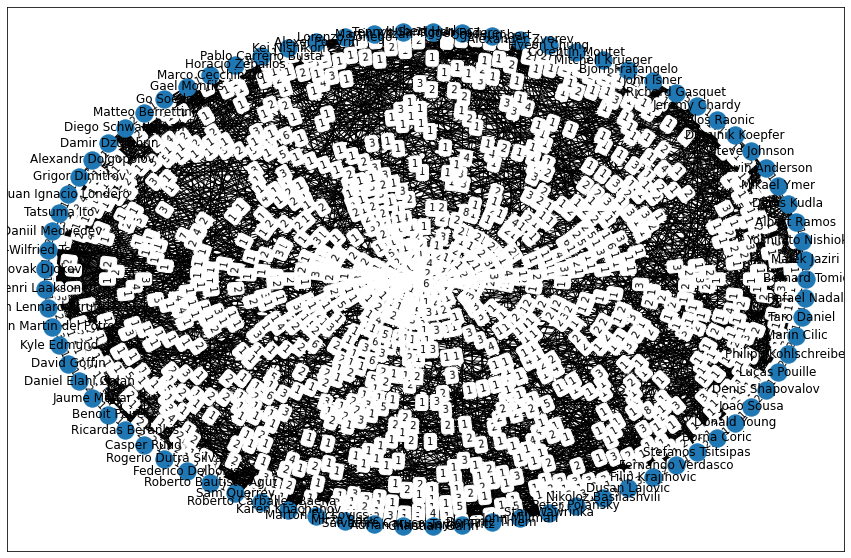

In [37]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, 'Novak Djokovic')
print(f"Čvorovi ego mreže igrača crraii su {ego_mreza.nodes}")
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

In [38]:
output_path = "models/Novak_all.gml"

nx.write_gml(ego_mreza, output_path)

In [43]:
Ego_node_Novak = G
for i in range(len(list(ego_mreza.nodes))):
    Ego_node_Novak = nx.contracted_nodes(Ego_node_Novak, 'Novak Djokovic', list(ego_mreza.nodes)[i])

for (n, d) in Ego_node_Novak.nodes(data=True):
    if('contraction' in d):
        del d['contraction']

        
output_path = "models/Novak_all_egonode.gml"

nx.write_gml(Ego_node_Novak, output_path)

### Rafael Nadal

In [39]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza_nadal = nx.ego_graph(G, 'Rafael Nadal')
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza_nadal,'weight')
pos = nx.circular_layout(ego_mreza_nadal)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
#nx.draw_networkx(ego_mreza, pos)
#nx.draw_networkx_edge_labels(ego_mreza_nadal, pos, edge_labels = tezine_grana)

<Figure size 1080x720 with 0 Axes>

In [40]:
output_path = "models/Nadal_all.gml"

nx.write_gml(ego_mreza_nadal, output_path)

In [44]:
Ego_node_Nadal = G
for i in range(len(list(ego_mreza_nadal.nodes))):
    Ego_node_Nadal = nx.contracted_nodes(Ego_node_Nadal, 'Rafael Nadal', list(ego_mreza_nadal.nodes)[i])

for (n, d) in Ego_node_Nadal.nodes(data=True):
    if('contraction' in d):
        del d['contraction']

        
output_path = "models/Nadal_all_egonode.gml"

nx.write_gml(Ego_node_Nadal, output_path)

### Roger Federer

{('Yoshihito Nishioka',
  'Philipp Kohlschreiber'): Text(0.8022995299081443, -0.39826496406917616, '1'),
 ('Yoshihito Nishioka',
  'Andreas Seppi'): Text(0.7679133124173305, -0.4221640125641762, '1'),
 ('Yoshihito Nishioka',
  'Benoit Paire'): Text(0.02134025390987171, -0.14451590718114313, '1'),
 ('Yoshihito Nishioka',
  'Alex De Minaur'): Text(0.12150249149149156, -0.32671030348708363, '2'),
 ('Yoshihito Nishioka',
  'Tomas Berdych'): Text(0.9164606335289345, 0.2766957663625432, '1'),
 ('Yoshihito Nishioka',
  'Fernando Verdasco'): Text(0.9164605441219675, -0.2766958673924158, '2'),
 ('Yoshihito Nishioka',
  'Marin Cilic'): Text(0.9842915833468417, -0.12434489823764233, '1'),
 ('Yoshihito Nishioka',
  'Taylor Fritz'): Text(0.32571399414511043, -0.468641002409022, '2'),
 ('Yoshihito Nishioka',
  'Fabio Fognini'): Text(0.8918467167289691, 0.3105738840604961, '1'),
 ('Yoshihito Nishioka',
  'Roger Federer'): Text(0.48952880562014917, 0.4998903350411174, '1'),
 ('Yoshihito Nishioka',
  '

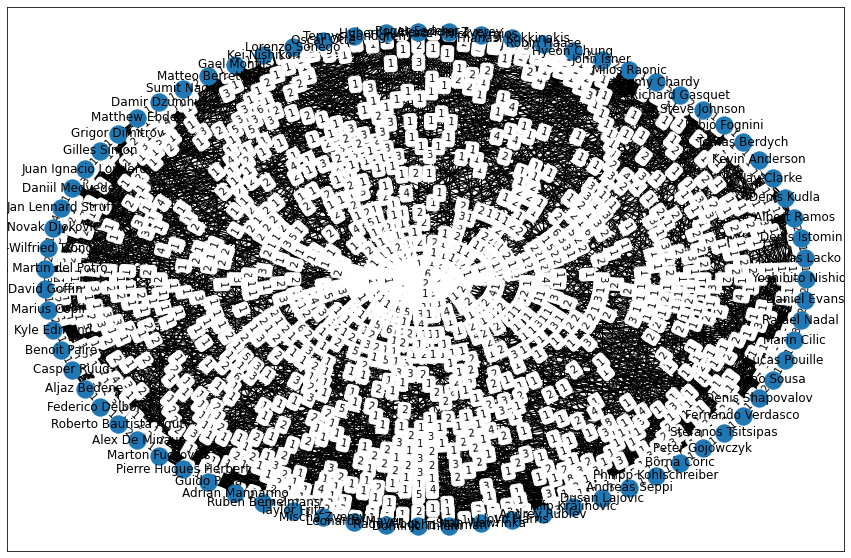

In [41]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza_roger = nx.ego_graph(G, 'Roger Federer')
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza_roger,'weight')
pos = nx.circular_layout(ego_mreza_roger)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza_roger, pos)
nx.draw_networkx_edge_labels(ego_mreza_roger, pos, edge_labels = tezine_grana)

In [42]:
output_path = "models/Roger_all.gml"

nx.write_gml(ego_mreza_roger, output_path)

In [45]:
Ego_node_Roger = G
for i in range(len(list(ego_mreza_roger.nodes))):
    Ego_node_Roger = nx.contracted_nodes(Ego_node_Roger, 'Roger Federer', list(ego_mreza_roger.nodes)[i])

for (n, d) in Ego_node_Roger.nodes(data=True):
    if('contraction' in d):
        del d['contraction']

        
output_path = "models/Roger_all_egonode.gml"

nx.write_gml(Ego_node_Roger, output_path)

### Centralnost mreze 

In [46]:
C_star = (G.number_of_nodes()-1)*(G.number_of_nodes()-1)
C_graph = 0
for i in range(G.number_of_nodes()):
    C_graph += max(list(G.degree), key=lambda x: x[1])[1] - list(G.degree)[i][1]
Cen = C_graph/C_star
Cen

0.1462039239001189

### Mreza Velike trojke

In [47]:
VT = G.copy()
for node in list(G.nodes):
    if not G.has_edge(node, 'Novak Djokovic') and not G.has_edge(node, 'Rafael Nadal') and not G.has_edge(node, 'Roger Federer'):
        print(node)
        VT.remove_node(node)

Felipe Meligeni Rodrigues Alves
Sanjar Fayziev
Viktor Troicki
Julian Lenz
Laurynas Grigelis
Kaipo Marshall
Daniel Masur
Pedro Sakamoto
Andrew Harris
Peter August Anker
Kenneth Raisma
Duck Hee Lee
Ari Fahresi
Marc Andrea Huesler
Thomaz Bellucci
Benjamin Hassan
Ze Zhang
Muhammad Althaf Dhaifullah
Jurgen Zopp
Hasan Ibrahim
Nicolas Almagro
Facundo Arguello
Jozef Kovalik
Ji Sung Nam
Tallon Griekspoor
Alejandro Mendoza
Alex Bolt
Janko Tipsarevic
Franco Roncadelli
Lorenzo Musetti
Lorenzo Giustino
Mikhail Youzhny
Yosuke Watanuki
Dzmitry Zhyrmont
Thiago Seyboth Wild
Youssef Hossam
Nicolas Alvarez
Holger Rune
Paul Jubb
Daniel Brands
Quinton Vega
Hazem Naw
Hugo Gaston
Nicola Kuhn
Jason Jung
Alen Avidzba
Julian Saborio
Alejandro Gonzalez
Gerardo Lopez Villasenor
Lukas Rosol
Reilly Opelka
Zdenek Kolar
Franko Skugor
Marcelo Tomas Barrios Vera
Paolo Lorenzi
Tung Lin Wu
Christopher Rungkat
Martin Cuevas
Andreas Haider Maurer
Alberto Lim
Danilo Petrovic
Filippo Baldi
Kevin Krawietz
Muzammil Murtaza
Adr

In [48]:
print(nx.info(VT))
print(nx.info(G))
proc = VT.number_of_nodes()/G.number_of_nodes()
proc

Name: 
Type: Graph
Number of nodes: 136
Number of edges: 3001
Average degree:  44.1324
Name: 
Type: Graph
Number of nodes: 581
Number of edges: 5330
Average degree:  18.3477


0.23407917383820998